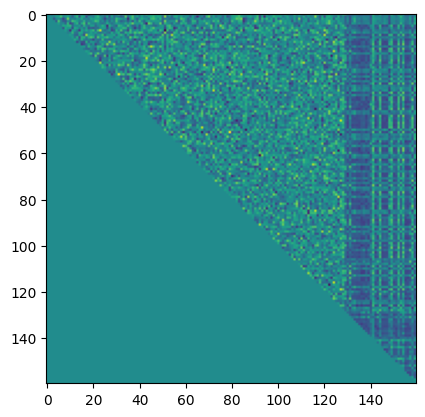

In [29]:
import torch
import kaiwu as kw

# num_node = 700
path = "./test/rbm_model100.pth"
# model.load_state_dict(torch.load(path))
model = torch.load(path, weights_only=False)

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(model.quadratic_coef.cpu().detach().numpy())
plt.show()

In [30]:
model.eval()

BoltzmannMachine()

In [31]:
kw.common.set_log_level("WARNING")
worker = kw.sampler.SimulatedAnnealingSampler(
    initial_temperature=100,
    alpha=0.9,
    cutoff_temperature=1e-2,
    iterations_per_t=10,
    size_limit=200,
    process_num=10,
)

In [32]:
solutions = model.sample(worker)
solutions = solutions.cpu().numpy()
print(solutions.shape)

(200, 160)


In [33]:
def deduplicate_arrays_structured(arr_list):
    # 将列表转换为二维数组
    arr_2d = np.vstack(arr_list)

    # 创建结构化数据类型
    dtype = [(f"f{i}", arr_2d.dtype) for i in range(arr_2d.shape[1])]

    # 视图转换为结构化数组
    struct_arr = arr_2d.view(dtype)

    # 使用np.unique去重
    unique_struct = np.unique(struct_arr)

    # 转回普通数组
    return unique_struct.view(arr_2d.dtype).reshape(-1, arr_2d.shape[1])

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


def pca_compare_plot(seqs1, seqs2, label1="gen", label2="train"):
    """
    对三组数据进行PCA降维并可视化比较

    参数:
        seqs1, seqs2, seqs3: 要比较的三组数据，应为numpy数组或可转换为数组的列表
        label1, label2, label3: 三组数据的标签，用于图例
    """
    # 转换为numpy数组并合并
    seqs1 = np.array(seqs1)
    seqs2 = np.array(seqs2)

    X = np.concatenate((seqs1, seqs2), axis=0)

    # 数据标准化
    X_std = StandardScaler().fit_transform(X)

    # 执行PCA降维到二维
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_std)

    # 分割回三组数据
    len1 = len(seqs1)
    len2 = len(seqs2)
    X1_pca = X_pca[:len1]
    X2_pca = X_pca[len1 : len1 + len2]
    X3_pca = X_pca[len1 + len2 :]

    # 创建散点图
    plt.figure(figsize=(5, 4))

    # 绘制三组数据的散点，使用不同颜色和透明度
    plt.scatter(X1_pca[:, 0], X1_pca[:, 1], c="tab:blue", alpha=0.5, label=label1, s=15)
    plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c="tab:red", alpha=0.5, label=label2, s=15)

    # 添加图标题和轴标签
    plt.xlabel("PC1 ({:.1f}%)".format(pca.explained_variance_ratio_[0] * 100))
    plt.ylabel("PC2 ({:.1f}%)".format(pca.explained_variance_ratio_[1] * 100))
    # plt.title(f"10000step,alpha=0.9,initT=100,num={unique_arrays.shape[0]}/10000")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()

    return plt.gcf()  # 返回图形对象，方便后续保存或修改

(71, 160)

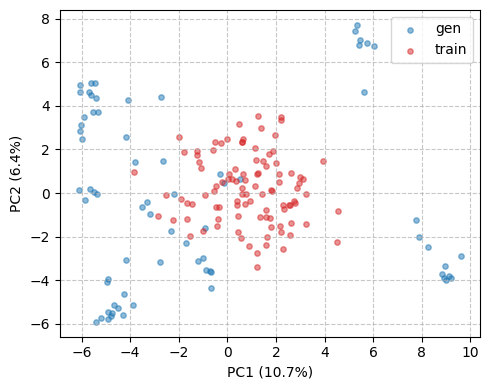

In [35]:
train = np.load("./data_input/z_128_100.npy")
pca_compare_plot(deduplicate_arrays_structured(solutions[:, :128]), train)
ret = np.unique(solutions, axis=0)
ret.shape